In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)

In [2]:
class simpleMetric(metrics.BaseMetric):
    def __init__(self, colname, **kwargs):
        self.colname = colname
        super().__init__(col=colname, **kwargs)
        
    def run(self, dataSlice, slicePoint=False):
        return np.mean(dataSlice[self.colname])
        

Querying database SummaryAllProps with constraint filter = "r" and night<300 for columns ['observationStartMJD', 'fieldRA', 'fieldDec', 'airmass']
Found 35602 visits
Running:  ['Sky1']
Completed metric generation.
Running:  ['Sky2']


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:97: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<300" constraint now.
Plotting complete.


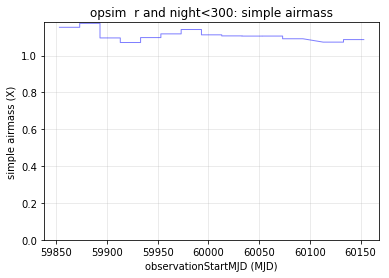

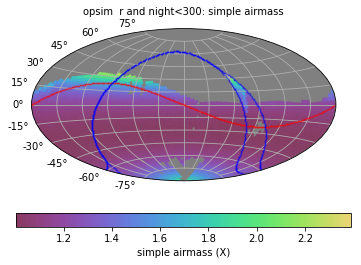

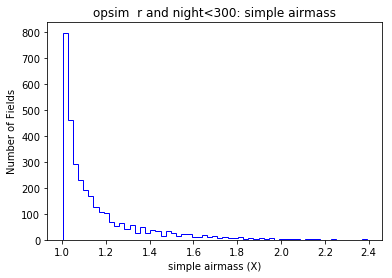

In [8]:
# Run the metric 
# metric, slicer, constraint
metric = simpleMetric(colname='airmass')
slicer1 = slicers.OneDSlicer(sliceColName='observationStartMJD', binsize=20)
slicer2 = slicers.OpsimFieldSlicer(fieldIdColName='fieldId')
sqlconstraint = 'filter = "r" and night<300'

# bundle
Sky1 = metricBundles.MetricBundle(metric, slicer1, sqlconstraint)
Sky2 = metricBundles.MetricBundle(metric, slicer2, sqlconstraint)

# group bundle
bundleDict = {'Sky1':Sky1, 'Sky2':Sky2}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)

Querying database SummaryAllProps with constraint filter = "r" and night<300 for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 35602 visits
Running:  ['Sky']


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:97: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<300" constraint now.
Plotting complete.


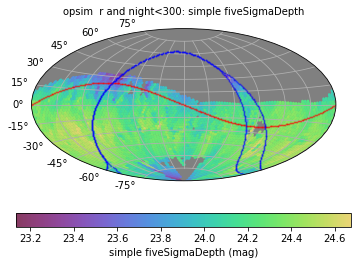

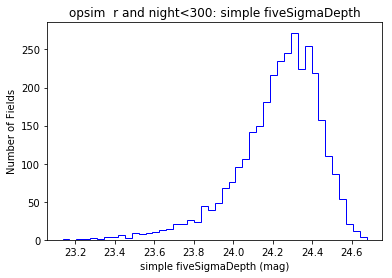

In [7]:
metric = simpleMetric(colname='fiveSigmaDepth')
slicer = slicers.OpsimFieldSlicer(fieldIdColName='fieldId')
sqlconstraint = 'filter = "r" and night<300'

# bundle
Sky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'Sky':Sky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)



## analysis use pandas

In [11]:
ls *.csv

obs500.csv  obs5000.csv  test.csv


In [17]:
import pandas as pd

data = pd.read_csv('obs5000.csv',delimiter=',')

In [18]:
data.head()

,observationId,night,observationStartTime,observationStartMJD,observationStartLST,numExposures,visitTime,visitExposureTime,proposalId,fieldId,...,rotSkyPos,moonRA,moonDec,moonAlt,moonAz,moonDistance,moonPhase,sunAlt,sunAz,solarElong
0,1,1,1.664584e+09,59853.016794,305.024754,2,34.0,30.0,3,1545,...,180.000000,249.112041,-24.364153,40.454122,262.507076,50.507212,28.156343,-22.064713,252.307367,113.652908
1,2,1,1.664584e+09,59853.017801,305.388247,2,34.0,30.0,4,3968,...,180.786087,249.123880,-24.365450,40.153420,262.362276,74.908148,28.166596,-22.362715,252.085284,113.722650
2,3,1,1.664584e+09,59853.019826,306.119410,2,34.0,30.0,2,300,...,179.244761,249.147694,-24.368059,39.548875,262.071866,53.289354,28.187218,-22.961002,251.635330,99.684471
3,4,1,1.664584e+09,59853.020278,306.282355,2,34.0,30.0,3,356,...,1.946736,249.153001,-24.368641,39.414206,262.007295,53.219750,28.191814,-23.094123,251.534455,101.629126
4,5,1,1.664584e+09,59853.020729,306.445299,2,34.0,30.0,3,421,...,359.233691,249.158308,-24.369222,39.279559,261.942775,53.228497,28.196410,-23.227165,251.433357,103.540403


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 36 columns):
observationId           5004 non-null int64
night                   5004 non-null int64
observationStartTime    5004 non-null float64
observationStartMJD     5004 non-null float64
observationStartLST     5004 non-null float64
numExposures            5004 non-null int64
visitTime               5004 non-null float64
visitExposureTime       5004 non-null float64
proposalId              5004 non-null int64
fieldId                 5004 non-null int64
fieldRA                 5004 non-null float64
fieldDec                5004 non-null float64
altitude                5004 non-null float64
azimuth                 5004 non-null float64
filter                  5004 non-null object
airmass                 5004 non-null float64
skyBrightness           5004 non-null float64
cloud                   5004 non-null float64
seeingFwhm500           5004 non-null float64
seeingFwhmGeom          5004 n

(-90, 40)

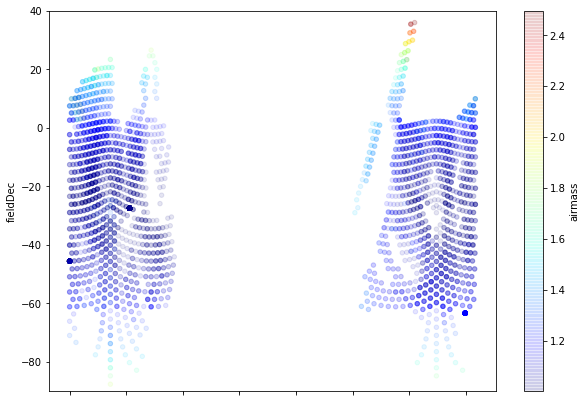

In [27]:
ax = data.plot(kind='scatter', x="fieldRA", y="fieldDec", alpha=0.1, figsize=(10,7),
              c="airmass", cmap=plt.get_cmap("jet"))
plt.ylim([-90,40])

In [30]:
corr_mat = data.corr()

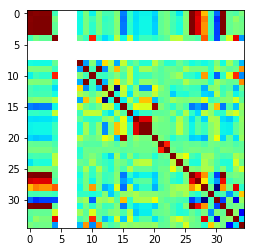

In [35]:
plt.imshow(corr_mat, cmap=plt.get_cmap("jet"))

In [ ]:
from pandas.plotting import scatter_matrix

#attributes = ["median_housing_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data, figsize=(100,100))
plt.savefig('matrix.pdf')

/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=34.0, right=34.0
  'left=%s, right=%s') % (left, right))
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=30.0, right=30.0
  'left=%s, right=%s') % (left, right))
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top result